## Lab 4 - part 2: Data Weights and Autocorellation

**TU Delft and WUR**<br>
**Q1 2024**<br>
**Instructor:** Theodoros Chatzivasileiadis <br>
**Instructor:** Hans Hoogenboom <br>
**TA:** Ka Yi Chua <br>
**[Metropolitan Data 1](https://jhoogenboom.github.io/spatial-data-science/_index.html)** <br>



## Exercise 4a: Spatial Autocorrelation and ESDA 

USE the Liverpool IMD data we have been using in previous sessions. This will require you to:

* Load up the IMD dataset for Liverpool.
* Create a choropleth of the `imd_score` variable.
* Compute the spatial weights matrix for the LSOAs. Think of one criterium to build it that you think would fit this variable (e.g. contiguity, distance-based, etc.), and apply it.
* Create the standardized version of the IMD scores.
* Calculate the spatial lag of the standardized scores.
* Create the Moran Plot.
* Calculate the value of Moran's I as well as its significance level.
* Perform a LISA analysis and generate a map of the results. What are the main patterns?

For this part I would like you to experiment with Data from Amstedam. However this will require you to find the dataset yourself!

## Question 1: Building a Contiguity-Based Weight Matrix

Use PySAL to create a contiguity-based weight matrix (W) for a given spatial dataset of polygons. Write a function create_contiguity_weights that:

    Reads in a shapefile of polygons.
    Constructs a Queen contiguity-based spatial weights matrix.
    Returns the weight matrix.

## Question 2: Calculating Moran’s I

Write a function calculate_morans_i that:

    Takes a spatial weight matrix W and an attribute array y.
    Calculates Moran’s I for the given attribute array.
    Returns the Moran’s I value and its p-value.

## Question 3: Standardizing Spatial Weight Matrices

Create a function standardize_weights that:

    Takes a spatial weight matrix W.
    Standardizes it so that the weights of each row sum to one.
    Returns the standardized weight matrix.

## Question 4: Creating Distance-Based Weights

Write a function create_distance_weights that:

    Takes a set of point coordinates and a threshold distance.
    Constructs a distance-based spatial weight matrix where all points within the threshold distance are assigned a weight.
    Returns the weight matrix.

## Question 5: Visualizing a Moran Plot

Using PySAL, write a function plot_moran that:

    Takes a spatial weights matrix W and an attribute array y.
    Creates and displays a Moran plot for the attribute.
    Saves the Moran plot as an image file.

In [20]:
# Question 1: Building a Continuity-Based Weight Matrix (Robert Laan)

# First import the needed libraries
import geopandas as gpd
from libpysal.weights import Queen

# Create the file path to the Brexit file and read the file
brxt_shp = gpd.read_file("C:\\Users\\rober\\Downloads\\brexit.gpkg\\brexit.gpkg")

# Below we will define the function
def construct_queen_weight_matrix(brxt_shp):
    """
    1. It reads the shp-file using the geopandas library and creating a geodataframe being gdf
    2. This line of code filters out the invalid rows of the geodataframe. Invalid values could include intersections between areas and themselves for example.
        The rectangular brackets function as a filter, where the 'is_valid' term could be seen as a 'True' statement creating Boolean values.
    3. The term 'Queen' creates a Queen continuity weight matrix. This matrix is based on whether two different areas either border and/or corner each other.
        The 'Queen' function is used on the selected geodataframe (gdf) and named queen_w. Ultimatly this value is returned.
    """
    gdf = gpd.read_file(brxt_shp)

    gdf = gdf[gdf.is_valid]

    queen_w = Queen.from_dataframe(gdf)

    return queen_w

# Printing the given continuity-based weight matrix to show what the matrix looks like. It is not in the assignment but it can be interesting to see what output is given.
    """
    The .full()[0] provides the first row that is full of the weight matrix. Therein, it can provide a better output example than a row that is not.
        Other than this line of code calls to print the weight matrix function.
    """
print(construct_queen_weight_matrix(file_path).full()[0])

C:\Users\rober\AppData\Local\Temp\ipykernel_17224\4272707165.py:23: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  queen_w = Queen.from_dataframe(gdf)


[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


c:\Users\rober\AppData\Local\Programs\Python\Python312\Lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 7 disconnected components.
 There are 6 islands with ids: 45, 51, 331, 339, 342, 358.
  W.__init__(self, neighbors, ids=ids, **kw)


In [26]:
# Question 2: Calculating Moran's I (Misha )

# First import the needed libraries and respective functions of those libraries
import pysal.lib
from pysal.lib import weights
from esda import Moran
import numpy as np

# Create the file path to the Brexit file
brxt_shp = gpd.read_file("C:\\Users\\rober\\Downloads\\brexit.gpkg\\brexit.gpkg") 

# Creating a function for Moran's I
"""
1. The capital W stands for the spatial weight matrix. We use it to express the relationship between two locations.
    The y stands for specific values of a certain location which are yet to be determined.
"""
def calculate_morans_i(W, y):
    
    # Calculate Moran's I
    """
    2. The Moran function from the esda module is used. The focus is on analyzing the specific values of each area relative to their spatial arrangement.
        That is why y is the first argument here and then W follows.
    """
    moran = esda.Moran(y, W)
    
    # Return Moran's I value, p-value
    """
    3. The Moran's I is returned together with the p-value. The p-value is included here to consider whether the Moran's I calculation is statistically significant.
    """
    return moran.I, moran.p_sim

# Create the spatial weights matrix (Queen contiguity)
W = weights.Queen.from_dataframe(brxt_shp)

# Extract the attribute array for st_areasha
y = brxt_shp['Valid_Vote'].values  

# Call the function to calculate Moran's I 
morans_i_value, p_value = calculate_morans_i(W, y)

print(morans_i_value, p_value)



C:\Users\rober\AppData\Local\Temp\ipykernel_17224\370783312.py:33: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  W = weights.Queen.from_dataframe(brxt_shp)


('WARNING: ', 45, ' is an island (no neighbors)')
('WARNING: ', 51, ' is an island (no neighbors)')
('WARNING: ', 331, ' is an island (no neighbors)')
('WARNING: ', 339, ' is an island (no neighbors)')
('WARNING: ', 342, ' is an island (no neighbors)')
('WARNING: ', 358, ' is an island (no neighbors)')
0.20107614963794007 0.001


c:\Users\rober\AppData\Local\Programs\Python\Python312\Lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 7 disconnected components.
 There are 6 islands with ids: 45, 51, 331, 339, 342, 358.
  W.__init__(self, neighbors, ids=ids, **kw)


In [10]:
# Question 3: Standardizing Spatial Weight Matrices (Mohammadjavad Hosseinabadi)
import numpy as np
from pysal.lib import weights

def standardize_weights(W):
    """ 
    1. This function recieves spatial weight matrix W.
    2. Then it sums up each row's values and divide them by overall of the row accordingly, and
    3. Returns the standardized weight matrix.

    """
    
    # calculating sum of values in the same row
    for i in W.neighbors:

        overall_weight = sum(W[i].values())
        
        # standardize each value, if the overall is not 0 (we have neighborhood there)
        if overall_weight > 0:

            for j in  W.neighbors[i]:
                W[i][j]= W[i][j] / overall_weight
                return
    
    return W

In [11]:
brxt_shp = gpd.read_file("C:\\Users\\Admin\\Desktop\\Code\\brexit.gpkg") 
W = weights.Queen.from_dataframe(brxt_shp)
standardize_weights(W)

C:\Users\Admin\AppData\Local\Temp\ipykernel_19368\1068889722.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  W = weights.Queen.from_dataframe(brxt_shp)
c:\Users\Admin\.conda\envs\gds\lib\site-packages\libpysal\weights\weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 7 disconnected components.
 There are 6 islands with ids: 45, 51, 331, 339, 342, 358.
  warnings.warn(message)


In [2]:
# Question 4: Creating Distance-Based Weights (Robert Laan)

# First import the needed libraries, modules, and functions
import numpy as np
from scipy.spatial import distance_matrix
import sys
from scipy.spatial import distance_matrix

"""
1. Creates a distance-based spatial weight matrix. The coordinates give specific location in the space. 
    The threshold_distance determines what is considered to be a neighboring distance.
"""
def create_distance_weights(coordinates, threshold_distance):
    """
    2. In this string an array is formed of the coordinates using the numpy library, which makes it easier to use the data in python funcitons.
    """
    coords_array = np.array(coordinates)
    """
    3. I formed a distance matrix with the arrays of the coordinates that computes the distance between each point in the array.
    """
    dist_matrix = distance_matrix(coords_array, coords_array)
    """
    4. A Boolean comparision is called using the '<=' to create the weight matrix with only 0's and 1's. 
        This last piece of information is ensured by the 'astype(int)' function so that the function only provides integers.
    """
    weight_matrix = (dist_matrix <= threshold_distance).astype(int)

    return weight_matrix

In [9]:
import geopandas as gpd
from pysal.lib import weights

brxt_shp = gpd.read_file("C:\\Users\\rober\\Downloads\\brexit.gpkg\\brexit.gpkg") 
W = weights.Queen.from_dataframe(brxt_shp)

print(brxt_shp['Region_Cod'])

C:\Users\rober\AppData\Local\Temp\ipykernel_21020\3774197145.py:5: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  W = weights.Queen.from_dataframe(brxt_shp)


0      E12000001
1      E12000001
2      E12000001
3      E12000001
4      E12000001
         ...    
375    W92000004
376    W92000004
377    W92000004
378    W92000004
379    W92000004
Name: Region_Cod, Length: 380, dtype: object


c:\Users\rober\AppData\Local\Programs\Python\Python312\Lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 7 disconnected components.
 There are 6 islands with ids: 45, 51, 331, 339, 342, 358.
  W.__init__(self, neighbors, ids=ids, **kw)


In [10]:
# OUTPUT HERE
"""
For the 
"""
coordinates = [
    (0, 0),
    (1, 1),
    (2, 2),
    (3, 3),
    (5, 5),
    (10, 10)
]

threshold_distance = 3.0

print(create_distance_weights(coordinates, threshold_distance))

[[1 1 1 0 0 0]
 [1 1 1 1 0 0]
 [1 1 1 1 0 0]
 [0 1 1 1 1 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 1]]


In [14]:
# Question 5: Visualizing a Moran Plot (Junbing Liao)

import numpy as np
import matplotlib.pyplot as plt
from pysal.explore import esda
from splot.esda import moran_scatterplot
import seaborn as sns
import pandas as pd
import pysal as ps
from pysal.lib import weights
from libpysal.io import open as psopen
import geopandas as gpd

"""
1. Similar to in question to the function for the Moran's I calculation is called using y for specific values and W for the Spatial Weight Matrix.
"""
def plot_moran(W, y):

    # Calculate Moran's I
    mi = esda.Moran(y, W)
    
    # Create the Moran scatter plot
    """
    2. The following string indicates that a scatterplot is called for using the plt functions from the matplotlib.pyplot library.
        The 'ax' term creates an object for the axes that will be defined later. B
        Between the curled brackets, the specifics of the scatterplot are indicated.
    """
    f, ax = plt.subplots()
    moran_scatterplot(mi, ax=ax, p=0.05)
    
    # Add labels and title
    ax.set_title("Moran's I Scatter Plot")
    ax.set_xlabel("Spatially Lagged Values")
    ax.set_ylabel("Attribute Values")
    
    # Save the plot
    """
    3. The dpi here indicates the resolution in dots per inch, being 300 in this case.
    """
    plt.savefig('C:\\Users\\Admin\\Desktop\\moran_plot.png', dpi=300)
    
    # Show the plot
    plt.show()

c:\Users\Admin\.conda\envs\gds\lib\site-packages\spaghetti\network.py:41: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)


C:\Users\Admin\AppData\Local\Temp\ipykernel_19368\2609910815.py:9: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  W = weights.Queen.from_dataframe(brxt_shp)
c:\Users\Admin\.conda\envs\gds\lib\site-packages\libpysal\weights\weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 7 disconnected components.
 There are 6 islands with ids: 45, 51, 331, 339, 342, 358.
  warnings.warn(message)
c:\Users\Admin\.conda\envs\gds\lib\site-packages\splot\_viz_esda_mpl.py:131: UserWarning: `p` is only used for plotting `esda.moran.Moran_Local`
or `Moran_Local_BV` objects
  warnings.warn(


('WARNING: ', 45, ' is an island (no neighbors)')
('WARNING: ', 51, ' is an island (no neighbors)')
('WARNING: ', 331, ' is an island (no neighbors)')
('WARNING: ', 339, ' is an island (no neighbors)')
('WARNING: ', 342, ' is an island (no neighbors)')
('WARNING: ', 358, ' is an island (no neighbors)')


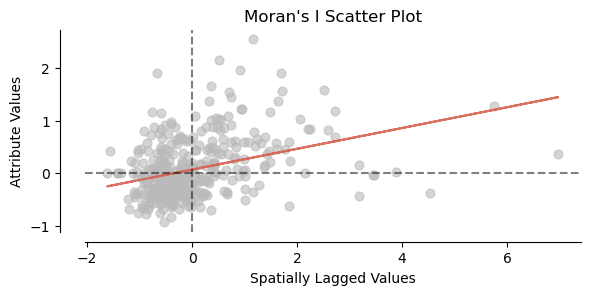

In [9]:
brxt_shp = gpd.read_file("C:\\Users\\Admin\\Desktop\\Code\\brexit.gpkg") 
W = weights.Queen.from_dataframe(brxt_shp)
y = brxt_shp['Valid_Vote'].values 
plot_moran(W, y)